In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
from IPython.display import HTML

np.set_printoptions(threshold=50, edgeitems=20)

PATH='./data/processed/'

In [3]:
train = pd.read_csv('./data/processed/train.csv',parse_dates=['click_time'], nrows=100000)
test = pd.read_csv('./data/processed/test.csv',parse_dates=['click_time'], nrows=10000)

In [4]:
len(train),len(test)

(100000, 10000)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
ip               100000 non-null int64
app              100000 non-null int64
device           100000 non-null int64
os               100000 non-null int64
channel          100000 non-null int64
click_time       100000 non-null datetime64[ns]
is_attributed    100000 non-null int64
hour             100000 non-null int64
ip_time_diff     100000 non-null float64
all_time_diff    100000 non-null float64
ip_count         100000 non-null int64
all_count        100000 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(9)
memory usage: 9.2 MB


In [6]:
train.head()

,ip,app,device,os,channel,click_time,is_attributed,hour,ip_time_diff,all_time_diff,ip_count,all_count
0,1,1,1,2,125,2017-11-09 14:34:10,0,14,1.0,-1.0,47,1
1,1,1,1,9,125,2017-11-09 03:01:54,0,3,0.0,44864.0,47,1
2,1,1,1,48,13,2017-11-09 10:42:11,0,10,465.0,-1.0,47,1
3,1,2,1,2,477,2017-11-08 17:47:39,0,17,1323.0,-1.0,47,5
4,1,2,1,2,477,2017-11-08 20:08:39,0,20,177.0,8460.0,47,5


In [7]:
cat_vars = ['ip', 'app', 'device', 'os', 'channel', 'hour']

contin_vars = ['ip_time_diff', 'all_time_diff', 'ip_count', 'all_count']

index = 'click_time'
label = 'is_attributed'

n = len(train); n

100000

In [8]:
for v in cat_vars: train[v] = train[v].astype('category').cat.as_ordered()

In [9]:
apply_cats(test, train)

In [10]:
for v in contin_vars:
    train[v] = train[v].astype('float32')
    test[v] = test[v].astype('float32')

In [11]:
train = train.set_index(index)
test = test.set_index(index)

In [19]:
test[label] = 0
#train[label] = train[label].astype('category').cat.as_ordered()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2017-11-09 14:34:10 to 2017-11-07 05:16:12
Data columns (total 11 columns):
ip               100000 non-null category
app              100000 non-null category
device           100000 non-null category
os               100000 non-null category
channel          100000 non-null category
is_attributed    100000 non-null int64
hour             100000 non-null category
ip_time_diff     100000 non-null float32
all_time_diff    100000 non-null float32
ip_count         100000 non-null float32
all_count        100000 non-null float32
dtypes: category(6), float32(4), int64(1)
memory usage: 3.8 MB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2017-11-10 04:51:27 to 2017-11-10 05:23:46
Data columns (total 11 columns):
click_id         10000 non-null int64
ip               8988 non-null category
app              9990 non-null category
device           9961 non-null category
os               9929 non-null category
channel          9993 non-null category
hour             10000 non-null category
ip_time_diff     10000 non-null float32
all_time_diff    10000 non-null float32
ip_count         10000 non-null float32
all_count        10000 non-null float32
dtypes: category(6), float32(4), int64(1)
memory usage: 411.5 KB


In [27]:
df, y, nas, mapper = proc_df(train, label, do_scale=True)
df_test, _, nas, mapper = proc_df(test, label, do_scale=True, mapper=mapper, na_dict=nas, skip_flds=['click_id'])

In [28]:
df.head()

,ip,app,device,os,channel,hour,ip_time_diff,all_time_diff,ip_count,all_count
click_time,,,,,,,,,,
2017-11-09 14:34:10,1,1,2,3,27,15,-0.194527,-0.536435,-2.043044,-0.444520
2017-11-09 03:01:54,1,1,2,10,27,4,-0.196819,1.671108,-2.043044,-0.444520
2017-11-09 10:42:11,1,1,2,48,3,11,0.869254,-0.536435,-2.043044,-0.444520
2017-11-08 17:47:39,1,2,2,3,141,18,2.836332,-0.536435,-2.043044,-0.320806
2017-11-08 20:08:39,1,2,2,3,141,21,0.208976,-0.120119,-2.043044,-0.320806


In [29]:
df_test.head()

,ip,app,device,os,channel,hour,ip_time_diff,all_time_diff,ip_count,all_count
click_time,,,,,,,,,,
2017-11-10 04:51:27,0,0,1,1,12,5,-0.199112,-0.536435,-2.069308,-0.413591
2017-11-10 04:54:10,0,0,1,1,12,5,0.176880,-0.528365,-2.069308,-0.413591
2017-11-10 04:54:32,1,10,2,8,18,5,-0.199112,-0.536435,-2.069891,-0.444520
2017-11-10 13:03:16,0,1,2,14,99,14,-0.196819,-0.536435,-2.067557,-0.444520
2017-11-10 13:03:16,0,3,2,14,99,14,-0.194527,-0.536385,-2.067557,-0.444520


In [30]:
train_ratio = 0.75
train_size = int(n * train_ratio)
val_idx = list(range(train_size, len(df)))

In [31]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

In [32]:
import numbers
import numpy as np
import torch


class AUCMeter():
    """
    The AUCMeter measures the area under the receiver-operating characteristic
    (ROC) curve for binary classification problems. The area under the curve (AUC)
    can be interpreted as the probability that, given a randomly selected positive
    example and a randomly selected negative example, the positive example is
    assigned a higher score by the classification model than the negative example.
    The AUCMeter is designed to operate on one-dimensional Tensors `output`
    and `target`, where (1) the `output` contains model output scores that ought to
    be higher when the model is more convinced that the example should be positively
    labeled, and smaller when the model believes the example should be negatively
    labeled (for instance, the output of a signoid function); and (2) the `target`
    contains only values 0 (for negative examples) and 1 (for positive examples).
    """

    def __init__(self):
        super(AUCMeter, self).__init__()
        self.reset()

    def reset(self):
        self.scores = torch.DoubleTensor(torch.DoubleStorage()).numpy()
        self.targets = torch.LongTensor(torch.LongStorage()).numpy()

    def add(self, output, target):
        if torch.is_tensor(output):
            output = output.cpu().squeeze().numpy()
        if torch.is_tensor(target):
            target = target.cpu().squeeze().numpy()
        elif isinstance(target, numbers.Number):
            target = np.asarray([target])
        assert np.ndim(output) == 1, \
            'wrong output size (1D expected)'
        assert np.ndim(target) == 1, \
            'wrong target size (1D expected)'
        assert output.shape[0] == target.shape[0], \
            'number of outputs and targets does not match'
        assert np.all(np.add(np.equal(target, 1), np.equal(target, 0))), \
            'targets should be binary (0, 1)'

        self.scores = np.append(self.scores, output)
        self.targets = np.append(self.targets, target)

    def value(self):
        # case when number of elements added are 0
        if self.scores.shape[0] == 0:
            return 0.5

        # sorting the arrays
        scores, sortind = torch.sort(torch.from_numpy(
            self.scores), dim=0, descending=True)
        scores = scores.numpy()
        sortind = sortind.numpy()

        # creating the roc curve
        tpr = np.zeros(shape=(scores.size + 1), dtype=np.float64)
        fpr = np.zeros(shape=(scores.size + 1), dtype=np.float64)

        for i in range(1, scores.size + 1):
            if self.targets[sortind[i - 1]] == 1:
                tpr[i] = tpr[i - 1] + 1
                fpr[i] = fpr[i - 1]
            else:
                tpr[i] = tpr[i - 1]
                fpr[i] = fpr[i - 1] + 1

        tpr /= (self.targets.sum() * 1.0)
        fpr /= ((self.targets - 1.0).sum() * -1.0)

        # calculating area under curve using trapezoidal rule
        n = tpr.shape[0]
        h = fpr[1:n] - fpr[0:n - 1]
        sum_h = np.zeros(fpr.shape)
        sum_h[0:n - 1] = h
        sum_h[1:n] += h
        area = (sum_h * tpr).sum() / 2.0

        return (area, tpr, fpr)

In [33]:
def roc(y_pred, targ):
    y_pred = y_pred.round()
    auc = AUCMeter()
    auc.add(y_pred, targ)
    area, tpr, fpr = auc.value()
    
    return area

In [43]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y.astype(np.float32), cat_flds=cat_vars, bs=128,test_df=df_test)

In [44]:
cat_sz = [(c, len(train[c].cat.categories)+1) for c in cat_vars]

In [45]:
cat_sz

[('ip', 50),
 ('app', 131),
 ('device', 70),
 ('os', 91),
 ('channel', 155),
 ('hour', 25)]

In [46]:
emb_szs = [(c, min(200, c)) for _,c in cat_sz]

In [47]:
emb_szs

[(50, 50), (131, 131), (70, 70), (91, 91), (155, 155), (25, 25)]

In [48]:
m = md.get_learner(emb_szs, len(contin_vars), 0.04, 1, [1000,500], [0.001,0.01])
lr = 1e-3

In [49]:
m.lr_find()

 30%|██▉       | 175/586 [00:04<00:08, 49.11it/s, loss=0.00348] 


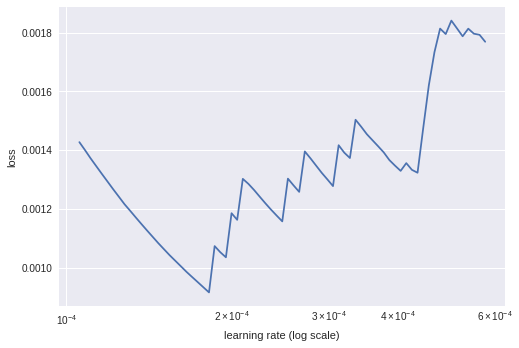

In [50]:
m.sched.plot(100)

In [51]:
m = md.get_learner(emb_szs, len(contin_vars), 0.04, 1, [1000,500], [0.001,0.01])
lr = 1e-4

In [52]:
from sklearn.metrics import fbeta_score

def f2(preds,targs,start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([fbeta_score(targs, (preds>th), 2, average='samples') for th in np.arange(start,end,step)])

In [53]:
from sklearn.metrics import roc_auc_score

def roc_auc(preds,targs):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max(roc_auc_score(targs, (preds>0.5), average='macro'),0)

In [54]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                     
    0      0.001908   0.001372   0.021968  
    1      0.001549   0.001365   0.023975                       
    2      0.001156   0.001194   0.018842                       



[0.0011937147, 0.018842084707235245]

In [ ]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

In [ ]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

### Test

In [ ]:
x,y=m.predict_with_targs()

In [ ]:
exp_rmspe(x,y)

In [ ]:
pred_test=m.predict(True)